# Support Vector Machine - Basics

Support Vector Machine (SVM) is one of the commonly used algorithm. 
It can be used for both classification and regression. 
Today we will walk through the basics of using SVM for classification. 

There are three sub modules in the svm module of scikit-learn. 

- LinearSVC, the linear version of SVC, same as SVC with linear kernel (more efficient).
- SVC, use svm for classification. 
- SVR, use svm for regression. 

The layout of the session will be as the following: 

- linear SVM
- kernels

In [33]:
#import all the needed package
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.datasets import make_moons, make_circles, make_classification
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVC

We start with the simple example of linear SVC, here we use the 'linear' kernal of SVC. 
We'll introduce the concept of a kernal later on.

We start with creating a data set that is a collection of two groups of points seperated by a plane. 

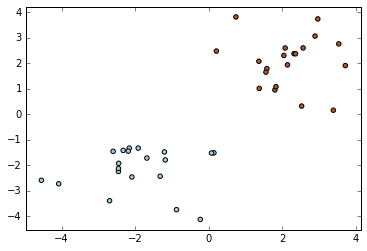

In [34]:
X = np.r_[np.random.randn(20,2) - [2,2],np.random.randn(20,2)+[2,2]]
Y = [0]*20+[1]*20
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Paired)
plt.axis('tight')
plt.show()

We initial the SVC, and fit our data as simple as the following. 

In [45]:
clf=SVC(kernel='linear')
clf.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Let's examine how SVC tries to classify the points. 
Before that, we want to first introduce a few attributes of the SVC class. 

- **hyperplane**: the plan that used to seperate the classes. 
    - coef_:
    - intercept_:
- **support vectors**: the training examples that are closest to the hyperplane are called support vectors. 
- **decision functions**: Distance of the samples X to the separating hyperplane.

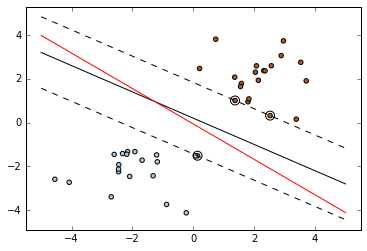

In [46]:
# get the separating hyper plane.
w=clf.coef_[0]
a=-w[0]/w[1]
xx=np.linspace(-5,5)
yy = a*xx-(clf.intercept_[0])/w[1]

# plot the paralles to the separating hyperplane that pass through the supporting vectors.
b=clf.support_vectors_[0]
yy_down = a*xx+(b[1]-a*b[0])
b=clf.support_vectors_[-1]
yy_up = a*xx + (b[1]-a*b[0])

#to compare with logistic regression
logistic = LogisticRegression()
logistic.fit(X,Y)
yy_log= -logistic.coef_[0][0]/logistic.coef_[0][1]*xx+logistic.intercept_[0]/logistic.coef_[0][1]

# let's look at the relation of these planes to our cluster of points. 
plt.plot(xx,yy,'k-')
plt.plot(xx,yy_down,'k--')
plt.plot(xx,yy_up,'k--')
plt.plot(xx,yy_log,'r-')
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=80,facecolors='none')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Paired)
plt.axis('tight')
plt.show()

In the above example, linear SVM is attemped to find the line that seperates the two classes 
and ensure **maximum margin**. 

**maximum margin** - The distance from the points on either size of the group to the line is maximized. This is determined by the hyperplane pass through the suporting vectors.

The selected support vectors can be used to define the margins. 
The plane found by SVM would usually be slight different from the logistic regression since they optimize different properties. 

Introduce the Kernals and their parameters:
 - linear: C
 - RBF: gamma, C
 - Polynomial: degree, coef0, gamma

C>0 is the penalty parameter of the error term (data points falls into the wrong class), and **linear SVM** with small C behaves more like **logistic regression**.

Let's compare the properties of the three kernels using three examples. 
We use the make_classification function from scikit-learn to create three different 
type of data sets: 
 - two classes that makes a circle together. 
 - two classes that can be sepearted by a circle.
 - two linear separable classes. 

In [21]:
names = ['LinearSVC','LinearSVC, C=0.025','SVCRBF,gamma=2','SVCRBF,gamma=10','SVCPOLY,degree=2','SVCPOLY,degree=4,coef=10,gamma=0.1']
classifiers=[
    SVC(kernel="linear"),
    SVC(kernel="linear", C=0.025),   
    SVC(gamma=2),
    SVC(gamma=10),
    SVC(kernel="poly",degree=2),
    SVC(kernel="poly",degree=4,coef0=10,gamma=0.1)
    ]
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.4, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

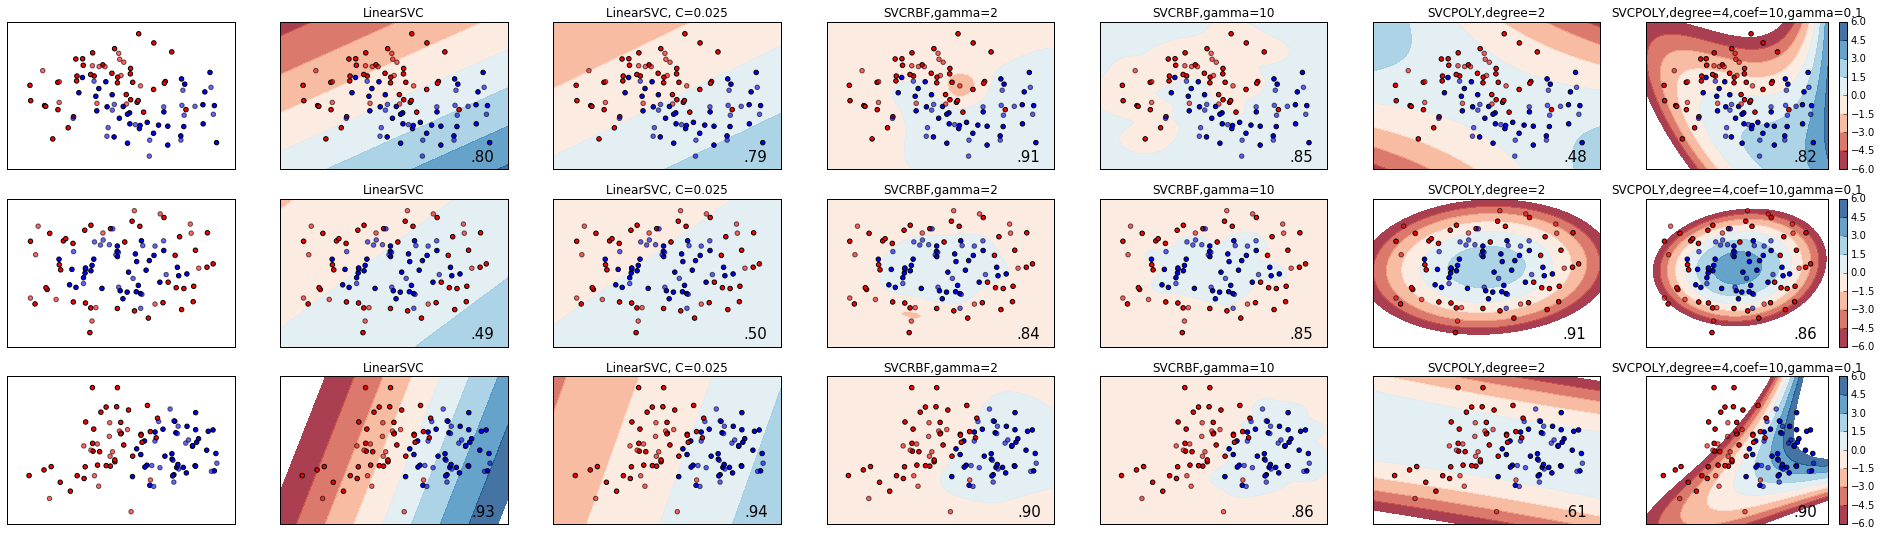

In [22]:
from matplotlib.colors import ListedColormap
figure = plt.figure(figsize=(27, 9))
i = 1
h = 0.1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        #score = clf.score(X_test, y_test)
        score=np.mean(cross_val_score(clf,X,y,cv=3,scoring='accuracy'))
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        #if hasattr(clf, "decision_function"):
        clf.fit(X, y)
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        
        #else:
        #Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        v = np.linspace(-6, 6., 9, endpoint=True)
        CS=ax.contourf(xx, yy, Z,v, cmap=cm, alpha=.8)
        if name=='SVCPOLY,degree=4,coef=10,gamma=0.1':
            #print Z.reshape(xx.shape)
            plt.colorbar(CS,ticks=v)
        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

There are lots of information in the above figures, let's break it down step by step:

- Decrease C means more regularization and more smooth decision function. 
- Increase gamma in RBF kernels and increase degree in polynomial kernels means more complicated decision function.
- RBF kernels can be easily used in general situations. 
- Linear kernels and polynomial kernels do the best when the underline hyperplane can be modeled with linear/polynimial functions. 

## Use the grid search method from scikit-learn to fine tune the SVM algorithms.

In [26]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
#print len(datasets)
X,Y=datasets[0]
X = StandardScaler().fit_transform(X)
#print X,Y
C_range = np.logspace(-3, 3, 10)
gamma_range = np.logspace(-3, 3, 10)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(Y, n_iter=5, test_size=0.3, random_state=42)
grid = GridSearchCV(SVC(kernel='rbf'), scoring="accuracy", param_grid=param_grid, cv=cv)
grid.fit(X, Y) 
print "The best parameters are %s with a score of %0.4f" % (grid.best_params_, grid.best_score_)

The best parameters are {'C': 2.154434690031882, 'gamma': 2.154434690031882} with a score of 0.9267


## Important Tips when using SVM

- Remember feature scaling (will see more in the afternoon).
- start with RBF kernel if sample size large (10-10,000), number of features small (1-1,000). 
- grid search for the best model. 

Reading Material:
http://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf

## Credit:
Most of the examples in this notebook are adopted from the documentation of Scikit-Learn. 